In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer,MinMaxScaler,PolynomialFeatures

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate, GridSearchCV, ShuffleSplit

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
from sklearn.tree import export_text


# 1: The Problem
It is a supervised regression problem for estimating the total amount paid by travelers for taxi journeys.
* inputs- features such as trip distance, passenger count, location, time etc.
* output-estimated total amount to be paid.
* Performance measure- r2_score

In [3]:
np.random.seed(42)

# 2:  Data Loading and Creating sets for evaluation and exploration

In [4]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
print("Train data shape: ",train_data.shape, "Test data shape: ",test_data.shape)
print("Train data columns: ",list(train_data.columns))
print("Test data columns: ",list(test_data.columns))
print("Train data info: ",train_data.info())

Train data shape:  (175000, 17) Test data shape:  (50000, 16)
Train data columns:  ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
Test data columns:  ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-nu

In [5]:
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


The columns are of mixed types. Although some columns are stored as numerical(like vendorId,payment_type) they are categorical.
* passeger_count, trip_distance,  PULocationID, DOLocationID, extra, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee are numerical features. 
* vendorID, ratecodeID,tpep_pickup_datetime, tpep_dropoff_datetime, store_and_fwd_flag, payment_type are categorical features.

### Features Importance

VendorID: Fare can depend on the vendor.

tpep_pickup_datetime and tpep_dropoff_datetime: Fare can depend on duration, time(peak and non peak time).

passenger_count: Fare can depend on the number of passengers during the ride.

trip_distance: Fare can depend on the distance traveled during the trip.

RatecodeID: Codes of various Rates.

store_and_fwd_flag: A flag indicating whether the trip data was stored and forwarded.

PULocationID and DOLocationID: Pickup and dropoff location identifiers.

payment_type: Payment type used for the ride.

extra,tip_amount,tolls_amount, improvement_surcharge, congestion_surcharge, Airport_fee are extras which directly add on to the total amount

### Creating sets for evaluation and exploration

In [6]:
train, test = train_test_split(train_data, test_size=0.2, random_state=42)

exploration_set=train.copy()

X_train=train.drop(['total_amount'],axis=1)
y_train=train['total_amount']

X_test=test.drop(['total_amount'],axis=1)
y_test=test['total_amount']

# 3. Data Visualization

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'extra'}>,
        <Axes: title={'center': 'tip_amount'}>],
       [<Axes: title={'center': 'tolls_amount'}>,
        <Axes: title={'center': 'improvement_surcharge'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'congestion_surcharge'}>],
       [<Axes: title={'center': 'Airport_fee'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

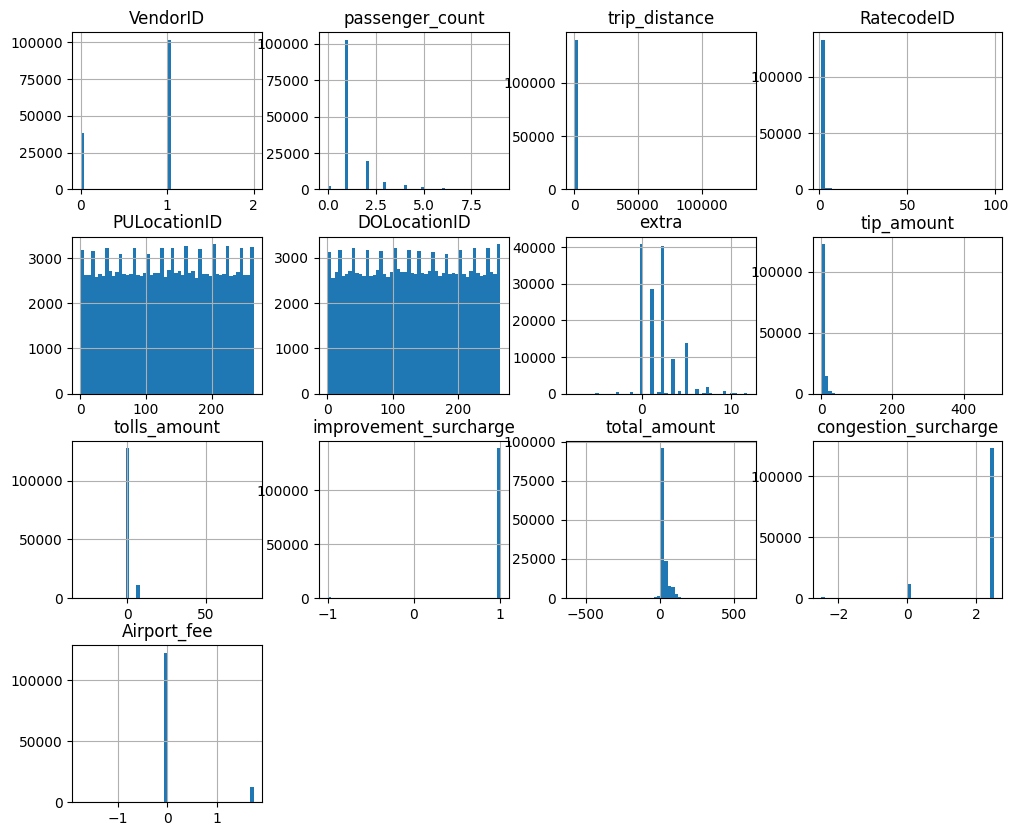

In [7]:
exploration_set.hist(bins=50, figsize=(12,10))

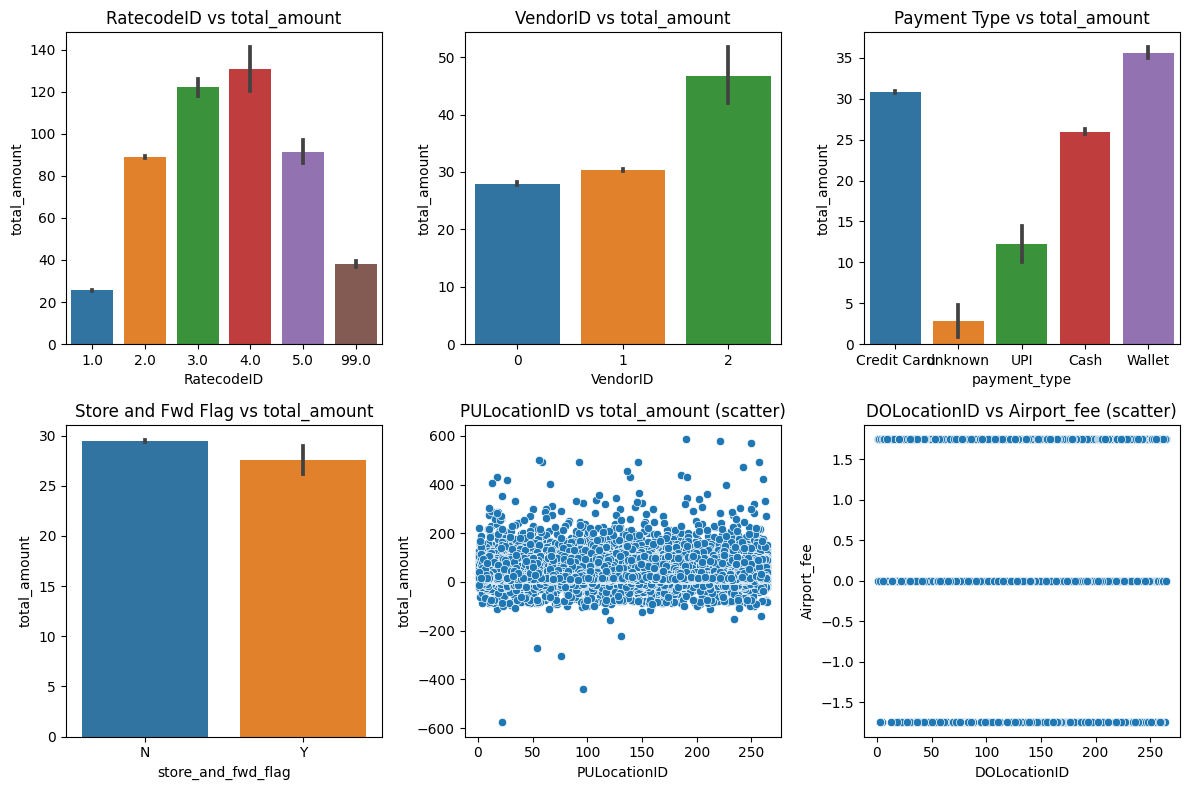

In [8]:
# Create subplots with a 3x3 grid
fig, axes = plt.subplots(2, 3, figsize=(12,8))

# Plot 1
sns.barplot(x='RatecodeID', y='total_amount', data=exploration_set, ax=axes[0, 0])
axes[0, 0].set_title('RatecodeID vs total_amount')

# Plot 2
sns.barplot(x='VendorID', y='total_amount', data=exploration_set, ax=axes[0, 1])
axes[0, 1].set_title('VendorID vs total_amount')

# Plot 3
sns.barplot(x='payment_type', y='total_amount', data=exploration_set, ax=axes[0, 2])
axes[0, 2].set_title('Payment Type vs total_amount')

# Plot 4
sns.barplot(x='store_and_fwd_flag', y='total_amount', data=exploration_set, ax=axes[1, 0])
axes[1, 0].set_title('Store and Fwd Flag vs total_amount')


# Plot 5
sns.scatterplot(x='PULocationID', y='total_amount', data=exploration_set, ax=axes[1, 1])
axes[1, 1].set_title('PULocationID vs total_amount (scatter)')

# Plot 6
sns.scatterplot(x='DOLocationID', y='Airport_fee', data=exploration_set, ax=axes[1, 2])
axes[1, 2].set_title('DOLocationID vs Airport_fee (scatter)')



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
exploration_set['tpep_pickup_datetime']=pd.to_datetime(exploration_set['tpep_pickup_datetime'])
exploration_set['tpep_dropoff_datetime']=pd.to_datetime(exploration_set['tpep_dropoff_datetime'])
exploration_set['duration'] = (abs(exploration_set['tpep_dropoff_datetime'] - exploration_set['tpep_pickup_datetime'])).dt.total_seconds()
exploration_set['pickup_hour'] = exploration_set['tpep_pickup_datetime'].dt.hour

<Axes: >

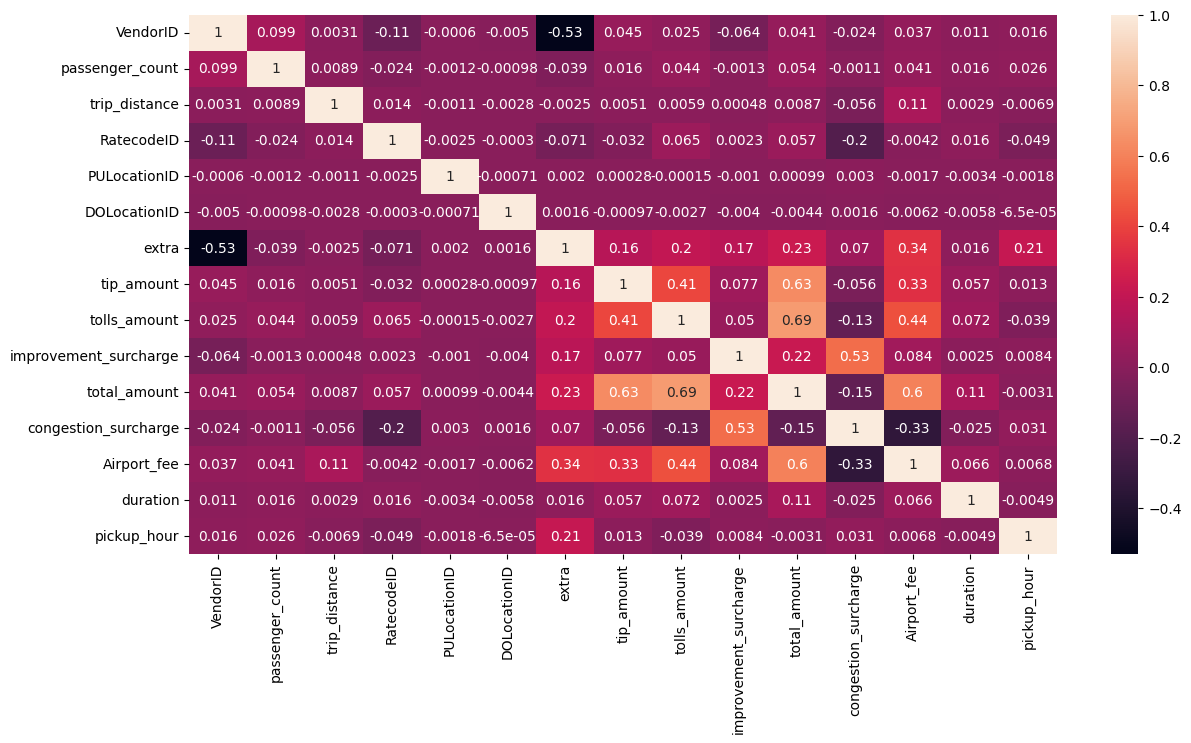

In [10]:
num_cols = exploration_set.select_dtypes(include=['int', 'float']).columns
corr_matrix = exploration_set[num_cols].corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

* We can observe that total amount has most correlation with extra, tip, tols, surcharges, airport fee.
Also many variables have correlation between them.
* Surprisingly, vendorID has strong negative correlation with extra. Although different vendors can charge different 'extra' but it should ideally be a nominal data. hence we need to convert binary data.
* The trip_distance has strong positively correlation with airport_fee which may mean that airport is far away from most places.

# 4. Prepare data for ML Algorithm

###  Data cleaning- Handling missing values

In [11]:
#Finding missing values
X_train.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4841
trip_distance               0
RatecodeID               4841
store_and_fwd_flag       4841
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4841
Airport_fee              4841
dtype: int64

In [12]:
#Finding unique values to see if there are type of missing values
for col in X_train.columns:
    if X_train[col].unique().size < 10:
        print(col, X_train[col].unique())

VendorID [1 0 2]
RatecodeID [ 1.  2. nan  5.  3. 99.  4.]
store_and_fwd_flag ['N' nan 'Y']
payment_type ['Credit Card' 'unknown' 'UPI' 'Cash' 'Wallet']
improvement_surcharge [ 1.  -1.   0.3  0. ]
congestion_surcharge [ 0.   2.5 -2.5  nan]
Airport_fee [ 1.75  0.     nan -1.75]


In [13]:
for column in X_train.columns:
    missing_values_count = X_train.loc[(X_train[column] == "?")|(X_train[column] == "-") | (X_train[column] == "unknown"), column].count()
    print(f"Missing values in {column}: {missing_values_count}")

Missing values in VendorID: 0
Missing values in tpep_pickup_datetime: 0
Missing values in tpep_dropoff_datetime: 0
Missing values in passenger_count: 0
Missing values in trip_distance: 0
Missing values in RatecodeID: 0
Missing values in store_and_fwd_flag: 0
Missing values in PULocationID: 0
Missing values in DOLocationID: 0
Missing values in payment_type: 1876
Missing values in extra: 0
Missing values in tip_amount: 0
Missing values in tolls_amount: 0
Missing values in improvement_surcharge: 0
Missing values in congestion_surcharge: 0
Missing values in Airport_fee: 0


### Data preprocessing Pipeline

**Data Engineering Function**
1. convert date columns to datetime format and extract hour from it
2. Drop the original columns after extraction
3. Drop store_and_fwd_flag as the column mostly has "N" as values.

In [14]:
def datetime_feature_engineering(df):
    df=df.copy()
    df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
    df['duration'] = (abs(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])).dt.total_seconds()
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df=df.drop('tpep_pickup_datetime',axis=1 )
    df=df.drop('tpep_dropoff_datetime',axis=1)
    df=df.drop('PULocationID',axis=1)
    df=df.drop('DOLocationID',axis=1)
    #df=df.drop('store_and_fwd_flag',axis=1)
    return df
feature_engineering = FunctionTransformer(datetime_feature_engineering)

**Imputation and Encoding**

In [15]:
numeric_cols = ['passenger_count', 'trip_distance', 'tip_amount','tolls_amount','extra','Airport_fee', 'duration','pickup_hour', 'improvement_surcharge', 'congestion_surcharge']
categorical_cols = ['RatecodeID','VendorID', 'payment_type','store_and_fwd_flag']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))   
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
impute_encode = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        
    ],sparse_threshold=0)

In [16]:
#imputing'unknown' values of  with payment_type with mode
def impute_payment_type(df):
    df=df.copy()
    df['payment_type']=df['payment_type'].replace('unknown',df['payment_type'].mode()[0])
    return df
payment_type_imputer = FunctionTransformer(impute_payment_type)

**The Final Preprocessing Pipeline**

In [17]:

data_preprocessing = Pipeline(steps=[('feature_engineering', feature_engineering),
                                     #('payment_type_imputer', payment_type_imputer),
                                     ('impute_encode', impute_encode)
                                     ])


### Functions for Model Evaluation with cross validation

In [18]:
def train_regressor(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_results = cross_validate(estimator,
                              X_train, 
                              y_train, 
                              cv=cv,
                              scoring="r2",
                              return_train_score=True,
                              return_estimator=True)
  train_score = cv_results["train_score"]
  test_score = cv_results["test_score"]
  print(f"Train R2 score: {train_score.mean():.2f} +/- {train_score.std():.2f}")
  print(f"Test R2 score: {test_score.mean():.2f} +/- {test_score.std():.2f}")



In [19]:
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(f"R2 score on Test data: {r2:.2f}")

In [20]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## **Model 1: Linear Regression**

#### **Baseline Model**

In [21]:
'''#model 
model1 = LinearRegression()

# pipeline
lin_reg_pipeline = Pipeline(steps=[('preprocessing', data_preprocessing),
                                 ('model', model1)])

train_regressor(lin_reg_pipeline, X_train, y_train, cv=5, name="Linear Regression")
eval(lin_reg_pipeline, X_test, y_test)'''

'#model \nmodel1 = LinearRegression()\n\n# pipeline\nlin_reg_pipeline = Pipeline(steps=[(\'preprocessing\', data_preprocessing),\n                                 (\'model\', model1)])\n\ntrain_regressor(lin_reg_pipeline, X_train, y_train, cv=5, name="Linear Regression")\neval(lin_reg_pipeline, X_test, y_test)'

#### **Best Model using cross validate**

In [22]:
''' 
lin_reg_cv_results = cross_validate(lin_reg_pipeline, X_train, y_train, cv=cv, scoring='r2', return_train_score=True, return_estimator=True)
train_scores = lin_reg_cv_results['train_score']
test_scores = lin_reg_cv_results['test_score']
print(f"Train R2 score: {train_scores.mean():.2f} +/- {train_scores.std():.2f}")
print(f"Test R2 score: {test_scores.mean():.2f} +/- {test_scores.std():.2f}")
print("Best model score:",max(test_scores))'''

' \nlin_reg_cv_results = cross_validate(lin_reg_pipeline, X_train, y_train, cv=cv, scoring=\'r2\', return_train_score=True, return_estimator=True)\ntrain_scores = lin_reg_cv_results[\'train_score\']\ntest_scores = lin_reg_cv_results[\'test_score\']\nprint(f"Train R2 score: {train_scores.mean():.2f} +/- {train_scores.std():.2f}")\nprint(f"Test R2 score: {test_scores.mean():.2f} +/- {test_scores.std():.2f}")\nprint("Best model score:",max(test_scores))'

#### Retraining the model on the with the best model and evaluating it against normal model

In [23]:
'''best_model_idx = np.argmax(test_scores)
best_model = lin_reg_cv_results['estimator'][best_model_idx]
best_model_pred = best_model.predict(X_test)
y_pred = lin_reg_pipeline.predict(X_test)
print("R2 score on test set: ", r2_score(y_test, y_pred))
print("R2 score on test set (best model): ", r2_score(y_test, best_model_pred))'''

'best_model_idx = np.argmax(test_scores)\nbest_model = lin_reg_cv_results[\'estimator\'][best_model_idx]\nbest_model_pred = best_model.predict(X_test)\ny_pred = lin_reg_pipeline.predict(X_test)\nprint("R2 score on test set: ", r2_score(y_test, y_pred))\nprint("R2 score on test set (best model): ", r2_score(y_test, best_model_pred))'

## **Model 2: Polynomial regression with Lasso regularization**

### Baseline model with fixed learning rate

In [24]:
'''
lasso_reg_pipeline=Pipeline(steps=[('preprocessing', data_preprocessing),
                                    ('scaler1', StandardScaler()),
                                    ('pca', PCA(n_components=25)),
                                    ('poly', PolynomialFeatures(degree=2)),
                                    ('scaler2', StandardScaler()),
                                    ('model', Lasso(alpha=0.07))])'''


"\nlasso_reg_pipeline=Pipeline(steps=[('preprocessing', data_preprocessing),\n                                    ('scaler1', StandardScaler()),\n                                    ('pca', PCA(n_components=25)),\n                                    ('poly', PolynomialFeatures(degree=2)),\n                                    ('scaler2', StandardScaler()),\n                                    ('model', Lasso(alpha=0.07))])"

In [25]:
'''train_regressor(lasso_reg_pipeline, X_train, y_train, cv=5, name="Lasso Regression")
eval(lasso_reg_pipeline, X_test, y_test)'''

'train_regressor(lasso_reg_pipeline, X_train, y_train, cv=5, name="Lasso Regression")\neval(lasso_reg_pipeline, X_test, y_test)'

### Hyper parameter tuning with LassoCV

In [26]:
'''alpha_list = np.logspace(-4, 0, num=20)
lasso_reg_pipeline = Pipeline(steps=[('preprocessing', data_preprocessing),
                                     ('scaler', StandardScaler()),
                                    ('pca', PCA(n_components=25)),
                                    ('poly', PolynomialFeatures(degree=2)),                                    
                                    ('LassoCV', LassoCV(alphas=alpha_list, 
                                                        cv=5))])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                    X_train, 
                                    y_train, 
                                    cv=5,
                                    scoring="r2",
                                    return_train_score=True,
                                    return_estimator=True)'''

'alpha_list = np.logspace(-4, 0, num=20)\nlasso_reg_pipeline = Pipeline(steps=[(\'preprocessing\', data_preprocessing),\n                                     (\'scaler\', StandardScaler()),\n                                    (\'pca\', PCA(n_components=25)),\n                                    (\'poly\', PolynomialFeatures(degree=2)),                                    \n                                    (\'LassoCV\', LassoCV(alphas=alpha_list, \n                                                        cv=5))])\nlasso_reg_cv_results = cross_validate(lasso_reg_pipeline,\n                                    X_train, \n                                    y_train, \n                                    cv=5,\n                                    scoring="r2",\n                                    return_train_score=True,\n                                    return_estimator=True)'

In [27]:
'''mean_train_score =lasso_reg_cv_results['train_score']
mean_test_score =lasso_reg_cv_results['test_score']

print(f"Best Mean score of decision tree regression model on the train set:\n"
      f"{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}")
print(f"Mean score of decision tree regression model on the test set:\n"
      f"{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}")

best_alphas = [est[-1].alpha_ for est in lasso_reg_cv_results["estimator"]]

print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")'''

'mean_train_score =lasso_reg_cv_results[\'train_score\']\nmean_test_score =lasso_reg_cv_results[\'test_score\']\n\nprint(f"Best Mean score of decision tree regression model on the train set:\n"\n      f"{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}")\nprint(f"Mean score of decision tree regression model on the test set:\n"\n      f"{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}")\n\nbest_alphas = [est[-1].alpha_ for est in lasso_reg_cv_results["estimator"]]\n\nprint(f"The mean optimal alpha leading to the best generalization performance is:\n"\n      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")'

### Fitting with the best alpha

In [28]:
'''lasso_reg_pipeline = Pipeline(steps=[('preprocessing', data_preprocessing),
                                     ('scaler1', StandardScaler()),
                                     ('pca', PCA(n_components=25)),
                                     ('poly', PolynomialFeatures(degree=2)),
                                     ('scaler2', StandardScaler()),
                                     ('Lasso', Lasso(alpha=0.09, max_iter=10000))])
lasso_reg_pipeline.fit(X_train, y_train)
lasso_reg_pipeline.score(X_test,y_test)'''

"lasso_reg_pipeline = Pipeline(steps=[('preprocessing', data_preprocessing),\n                                     ('scaler1', StandardScaler()),\n                                     ('pca', PCA(n_components=25)),\n                                     ('poly', PolynomialFeatures(degree=2)),\n                                     ('scaler2', StandardScaler()),\n                                     ('Lasso', Lasso(alpha=0.09, max_iter=10000))])\nlasso_reg_pipeline.fit(X_train, y_train)\nlasso_reg_pipeline.score(X_test,y_test)"

## Model3: DecisionTreeRegressor

### Baseline model

In [29]:
dt_reg_pipeline = Pipeline([('preprocessing', data_preprocessing),
                            ('scaler', StandardScaler()),
                            ("dt_reg", DecisionTreeRegressor(random_state = 42))])

In [30]:
'''train_regressor(dt_reg_pipeline, X_train, y_train, cv=5, name="Decision Tree Regression")
eval(dt_reg_pipeline, X_test, y_test)'''

'train_regressor(dt_reg_pipeline, X_train, y_train, cv=5, name="Decision Tree Regression")\neval(dt_reg_pipeline, X_test, y_test)'

### Hyper Perameter Tuning using GridSearchCV

In [31]:
'''param_grid = {'dt_reg__max_depth': range(5, 15),
              'dt_reg__min_samples_split':range(2,8)}
dt_grid_search = GridSearchCV(dt_reg_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=-1,
                                 cv=cv,
                                 scoring="r2",
                                 return_train_score=True)
dt_grid_search.fit(X_train,y_train)'''

'param_grid = {\'dt_reg__max_depth\': range(5, 15),\n              \'dt_reg__min_samples_split\':range(2,8)}\ndt_grid_search = GridSearchCV(dt_reg_pipeline,\n                                 param_grid=param_grid,\n                                 n_jobs=-1,\n                                 cv=cv,\n                                 scoring="r2",\n                                 return_train_score=True)\ndt_grid_search.fit(X_train,y_train)'

In [32]:
'''mean_train_score = dt_grid_search.cv_results_['mean_train_score'][dt_grid_search.best_index_]
mean_test_score = dt_grid_search.cv_results_['mean_test_score'][dt_grid_search.best_index_]
std_train_score = dt_grid_search.cv_results_['std_train_score'][dt_grid_search.best_index_]
std_test_score = dt_grid_search.cv_results_['std_test_score'][dt_grid_search.best_index_]

print(f"Best Mean score of decision tree regression model on the train set:\n"
      f"{mean_train_score:.3f} +/- {std_train_score:.3f}")
print(f"Mean score of decision tree regression model on the test set:\n"
      f"{mean_test_score:.3f} +/- {std_test_score:.3f}")'''

'mean_train_score = dt_grid_search.cv_results_[\'mean_train_score\'][dt_grid_search.best_index_]\nmean_test_score = dt_grid_search.cv_results_[\'mean_test_score\'][dt_grid_search.best_index_]\nstd_train_score = dt_grid_search.cv_results_[\'std_train_score\'][dt_grid_search.best_index_]\nstd_test_score = dt_grid_search.cv_results_[\'std_test_score\'][dt_grid_search.best_index_]\n\nprint(f"Best Mean score of decision tree regression model on the train set:\n"\n      f"{mean_train_score:.3f} +/- {std_train_score:.3f}")\nprint(f"Mean score of decision tree regression model on the test set:\n"\n      f"{mean_test_score:.3f} +/- {std_test_score:.3f}")'

In [33]:
'''print ("Mean cross validated score of the best estimator is: ", dt_grid_search.best_score_)
print ("The best parameter value is:", dt_grid_search.best_params_)'''

'print ("Mean cross validated score of the best estimator is: ", dt_grid_search.best_score_)\nprint ("The best parameter value is:", dt_grid_search.best_params_)'

### Retraing Model with Best Parameters

In [34]:
'''dt_reg_pipeline.set_params(dt_reg__max_depth=11, dt_reg__min_samples_split=7).fit(X_train,y_train)
dt_reg_pipeline.score(X_test, y_test)'''

'dt_reg_pipeline.set_params(dt_reg__max_depth=11, dt_reg__min_samples_split=7).fit(X_train,y_train)\ndt_reg_pipeline.score(X_test, y_test)'

## Model 4 : BaggingRegressor

### Baseline model

In [35]:
bagging_regressor_pipeline =Pipeline(steps=[('preprocessing', data_preprocessing),
                                     ('scaler', StandardScaler()),
                                     ('mod',BaggingRegressor())
                                     ])

In [36]:
#train_regressor(preprocess , X_train, y_train, cv, 'decision tree regressor')
#eval(preprocess, X_test, y_test)


### Hyper Parameter Tuning using GridSearchCV

In [37]:
"""param_grid = {
    'mod__n_estimators': [10, 50, 100, 200],
    'mod__max_samples': [0.5, 1.0]
}

grid_search = GridSearchCV(bagging_regressor_pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)"""

"param_grid = {\n    'mod__n_estimators': [10, 50, 100, 200],\n    'mod__max_samples': [0.5, 1.0]\n}\n\ngrid_search = GridSearchCV(bagging_regressor_pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=3)\n\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.best_params_)"

### Retraing Model with Best Parameters

In [38]:
bagging_regressor_pipeline.set_params(mod__n_estimators=100, mod__max_samples=1.0).fit(X_train, y_train)
bagging_regressor_pipeline.score(X_test, y_test)


0.9597520002705117

## Model 5: RandomForestRegressor

### Baseline model

In [39]:
random_forest_pipeline=Pipeline(steps=[('preprocessing', data_preprocessing),
                                     ('mod',RandomForestRegressor(n_estimators=100, random_state=0))
                                     ])

In [40]:
#train_regressor(random_forest_pipeline , X_train, y_train, cv, 'Random Forest Regressor')
#eval(random_forest_pipeline, X_test, y_test)

### Hyper Parameter Tuning using GridSearchCV

In [41]:
'''
param_grid = {
    'mod__n_estimators': [100, 200, 300],
    'mod__max_depth': [None, 5, 10, 15],
    'mod__min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(random_forest_pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=3)


grid_search.fit(X_train, y_train)


print(grid_search.best_params_)'''

"\nparam_grid = {\n    'mod__n_estimators': [100, 200, 300],\n    'mod__max_depth': [None, 5, 10, 15],\n    'mod__min_samples_split': [2, 5, 10]\n}\n\n\ngrid_search = GridSearchCV(random_forest_pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=3)\n\n\ngrid_search.fit(X_train, y_train)\n\n\nprint(grid_search.best_params_)"

### Retraing Model with Best Parameters

In [42]:
random_forest_pipeline=Pipeline(steps=[('preprocessing', data_preprocessing),
                                     ('mod',RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=2, random_state=0))
                                     ])
random_forest_pipeline.fit(X_train, y_train)
random_forest_pipeline.score(X_test, y_test)

0.9611485796581966

### Final Prediction with best Model

In [43]:
final_prediction=random_forest_pipeline.predict(test_data)

In [44]:
submission=pd.DataFrame(columns=['ID','total_amount'])
submission['ID']=[i for i in range(1,len(final_prediction)+1)]
submission['total_amount']=final_prediction
submission.to_csv('submission.csv',index=False)

In [45]:
submission.shape

(50000, 2)